# Computer vision 992 final project
## part one
### calculate the homography matrix for two given images

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

First of all let's read and display both images

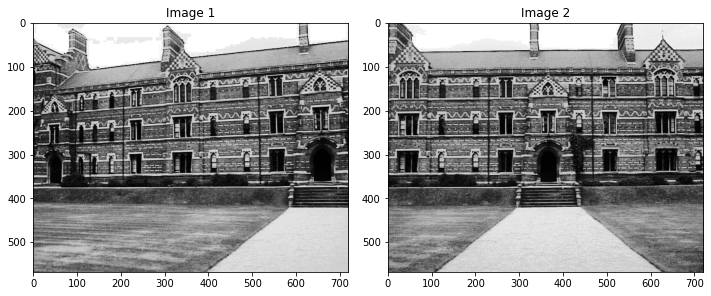

In [2]:
img1 = cv.imread("./images/building1.jpg", cv.IMREAD_GRAYSCALE)
img2 = cv.imread("./images/building2.jpg", cv.IMREAD_GRAYSCALE)
img1 = cv.equalizeHist(img1)
img2 = cv.equalizeHist(img2)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img1, cmap="gray")
plt.title("Image 1")
plt.subplot(1,2,2)
plt.imshow(img2, cmap="gray")
plt.title("Image 2")
plt.tight_layout()
plt.show()

To calculate the homography matrix between two images we are in need of some **intrest points** in both images. These point could be calculated using Harris Detector method. fortunatly OpenCV has a built in function as cornerHarris that calculates these corners for us. 

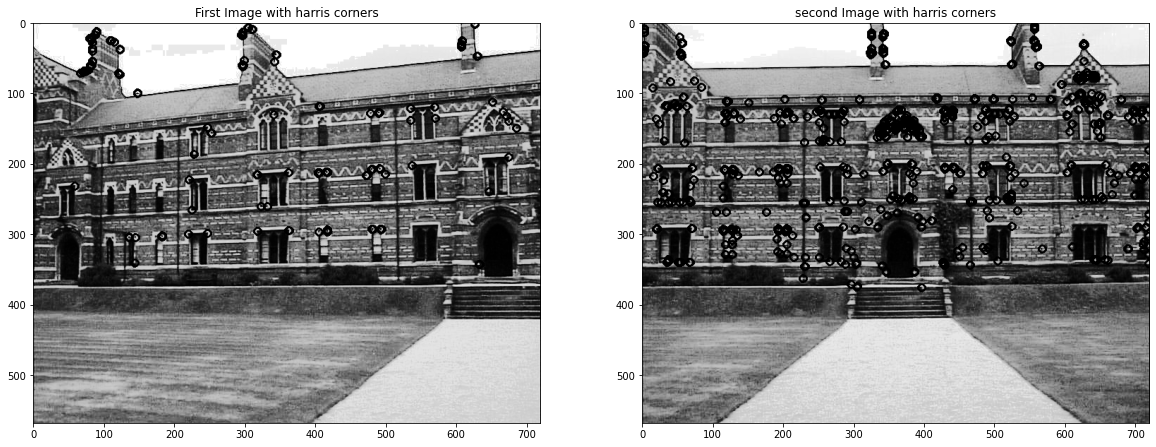

In [3]:
# Thresholds
threshold = 110
# Detector parameters
blockSize = 2
apertureSize = 3
k = 0.04
# Detecting corners
dst1 = cv.cornerHarris(img1, blockSize, apertureSize, k)
dst2 = cv.cornerHarris(img2, blockSize, apertureSize, k)
# Normalizing
dst_norm1 = np.empty(dst1.shape, dtype=np.float32)
dst_norm2 = np.empty(dst2.shape, dtype=np.float32)
# Normalization
dst_norm1 = cv.normalize(dst1, dst_norm1, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
dst_norm2 = cv.normalize(dst2, dst_norm2, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)

dst_norm_scaled1 = cv.convertScaleAbs(dst_norm1)
dst_norm_scaled2 = cv.convertScaleAbs(dst_norm2)

img1_cpy = np.array(img1)
img2_cpy = np.array(img2)

# Drawing a circle around corners around first image
for i in range(dst_norm1.shape[0]):
    for j in range(dst_norm1.shape[1]):
        if dst_norm1[i,j] > threshold:
            cv.circle(img1_cpy, (j,i), 5, (0), 2)

# Drawing a circle around corners in second image
for i in range(dst_norm2.shape[0]):
    for j in range(dst_norm2.shape[1]):
        if dst_norm2[i,j] > threshold:
            cv.circle(img2_cpy, (j,i), 5, (0), 2)

# Showing the result
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img1_cpy, cmap="gray")
plt.title("First Image with harris corners")
plt.subplot(1,2,2)
plt.title("second Image with harris corners")
plt.imshow(img2_cpy, cmap="gray")
plt.show()

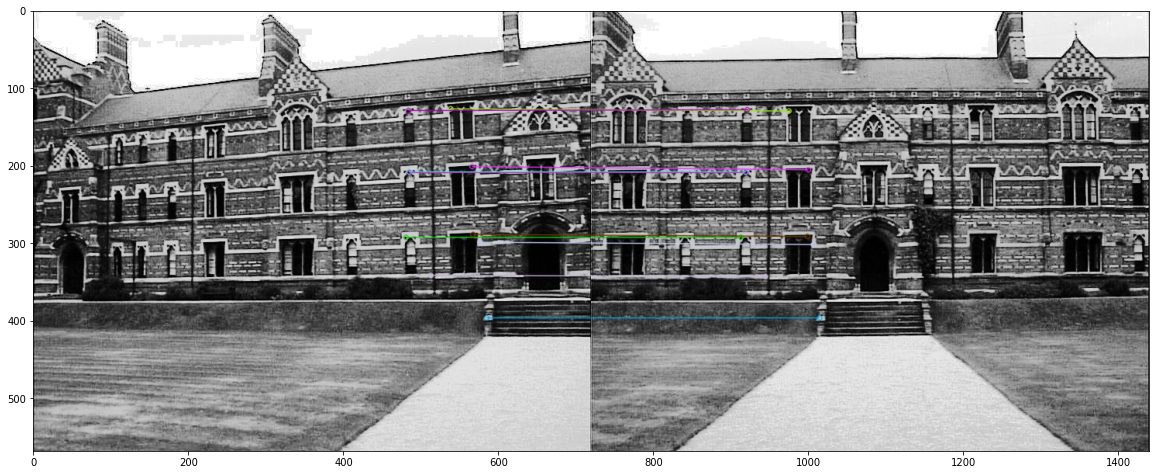

(<matplotlib.image.AxesImage at 0x14618ab80>, None)

In [5]:
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20,20))
plt.imshow(img3),plt.show()

In [6]:
print(matches)

[<DMatch 0x14590a450>, <DMatch 0x145ce8dd0>, <DMatch 0x145ce8f10>, <DMatch 0x145ce88d0>, <DMatch 0x145ce8450>, <DMatch 0x14590a950>, <DMatch 0x145ce8410>, <DMatch 0x14590a690>, <DMatch 0x145ce8e90>, <DMatch 0x14590a3d0>, <DMatch 0x145ce8cb0>, <DMatch 0x145ce8f70>, <DMatch 0x145ce85f0>, <DMatch 0x145ce8a30>, <DMatch 0x145ce8b70>, <DMatch 0x14590a610>, <DMatch 0x14590a830>, <DMatch 0x145ce85b0>, <DMatch 0x145ce8810>, <DMatch 0x14590a5b0>, <DMatch 0x145ce8a10>, <DMatch 0x14590aa30>, <DMatch 0x14590aa90>, <DMatch 0x145ce8210>, <DMatch 0x145ce8830>, <DMatch 0x14590aa50>, <DMatch 0x145ce85d0>, <DMatch 0x145ce8b90>, <DMatch 0x145ce8cf0>, <DMatch 0x14590a470>, <DMatch 0x14590a530>, <DMatch 0x14590a6b0>, <DMatch 0x14590a7d0>, <DMatch 0x145ce81b0>, <DMatch 0x145ce8470>, <DMatch 0x145ce87f0>, <DMatch 0x14590a050>, <DMatch 0x14590a1d0>, <DMatch 0x145ce8170>, <DMatch 0x145ce82d0>, <DMatch 0x145ce89b0>, <DMatch 0x145ce8c90>, <DMatch 0x14590a2b0>, <DMatch 0x14590a5f0>, <DMatch 0x14590a8b0>, <DMatch 0